Sascha Spors,
Professorship Signal Theory and Digital Signal Processing,
Institute of Communications Engineering (INT),
Faculty of Computer Science and Electrical Engineering (IEF),
University of Rostock,
Germany

# Tutorial Digital Signal Processing

**Random Signals, Ensemble & Temporal Averages**,
Winter Semester 2021/22 (Course #24505)

- lecture: https://github.com/spatialaudio/digital-signal-processing-lecture
- tutorial: https://github.com/spatialaudio/digital-signal-processing-exercises

Feel free to contact lecturer frank.schultz@uni-rostock.de

WIP...

In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from numpy.random import Generator, PCG64
from scipy import signal
from scipy import stats

In [2]:
def my_xcorr(x, y):
    N, M = len(x), len(y)
    kappa = np.arange(N+M-1) - (M-1)
    ccf = signal.correlate(x, y, mode='full', method='auto')
    return kappa, ccf

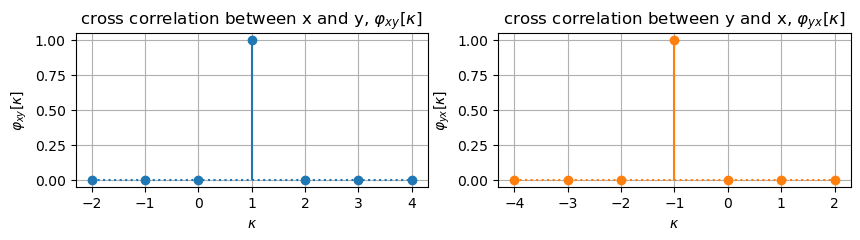

In [3]:
if True:  # test my_xcorr with simple example
    x = np.array([0, 1, 0, 0, 0])
    y = np.array([1, 0, 0])
    # plot my_xcorr(x, y) vs. my_xcorr(y, x)
    plt.figure(figsize=(10, 2))
    plt.subplot(1, 2, 1)
    kappa_xy, ccf_xy = my_xcorr(x, y)
    plt.stem(kappa_xy, ccf_xy,
             basefmt='C0:',
             linefmt='C0',
             markerfmt='C0o')
    plt.xlabel(r'$\kappa$')
    plt.ylabel(r'$\varphi_{xy}[\kappa]$')
    plt.title(r'cross correlation between x and y, $\varphi_{xy}[\kappa]$')
    plt.grid(True)
    plt.subplot(1, 2, 2)
    kappa_yx, ccf_yx = my_xcorr(y, x)
    plt.stem(kappa_yx, ccf_yx,
             basefmt='C1:',
             linefmt='C1',
             markerfmt='C1o')
    plt.xlabel(r'$\kappa$')
    plt.ylabel(r'$\varphi_{yx}[\kappa]$')
    plt.title(r'cross correlation between y and x, $\varphi_{yx}[\kappa]$')
    plt.grid(True)

# First-Order Ensemble Averages

For a probability density function (PDF) $p_x(\theta, k)$ which describes a random process of 'drawing' signal amplitudes $\theta$ for the $n$-th sample function $x_n[k]$ over time $k$, we can define the following **expectation**

\begin{equation}
\begin{split}
E\{ f(x[k]) \} = \int\limits_{-\infty}^{\infty} f(\theta) \, p_x(\theta, k) \, \mathrm{d}\theta\\
E\{ f(x[k]) \} = \lim_{N \to \infty} \frac{1}{N} \sum_{n=0}^{N-1} f(x_n[k])
\end{split}
\end{equation}

using the operator or **mapping function** $f(\cdot)$.

Most important are the following **first-order** ensemble averages, also called **univariate** moments, named so, since **one** random process is involved.

#### Linear mean / 1st raw moment

for mapping function $f(\theta)=\theta^1$

\begin{equation}
\begin{split}
\mu_x[k] = E\{ x[k] \} = \int\limits_{-\infty}^{\infty} \theta \, p_x(\theta, k) \, \mathrm{d}\theta\\
\mu_x[k] = E\{ x[k] \} = \lim_{N \to \infty} \frac{1}{N} \sum_{n=0}^{N-1} x_n[k]
\end{split}
\end{equation}

#### Quadratic mean / 2nd raw moment

for mapping function $f(\theta)=\theta^2$

\begin{equation}
\begin{split}
E\{ x^2[k] \} = \int\limits_{-\infty}^{\infty} \theta^2 \, p_x(\theta, k) \, \mathrm{d}\theta\\
E\{ x^2[k] \} = \lim_{N \to \infty} \frac{1}{N} \sum_{n=0}^{N-1} x_n^2[k]
\end{split}
\end{equation}

#### Variance / 2nd centralized moment

for mapping function $f(\theta) = (\theta - \mu_x[k])^2$

\begin{equation}
\begin{split}
\sigma_x^2[k] = E\{ (x[k] - \mu_x[k])^2 \} = \int\limits_{-\infty}^{\infty} (\theta - \mu_x[k])^2 \, p_x(\theta, k) \, \mathrm{d}\theta\\
\sigma_x^2[k] = E\{ (x[k] - \mu_x[k])^2 \} = \lim_{N \to \infty} \frac{1}{N} \sum_{n=0}^{N-1} (x_n[k] - \mu_x[k])^2
\end{split}
\end{equation}

These three moments are generally linked as
\begin{equation}
E\{ x^2[k] \} = \mu_x^2[k] + \sigma_x^2[k],
\end{equation}
which reads quadratic mean is linear mean plus variance.


For **stationary processes** these ensemble averages are not longer time-dependent, but rather $\mu_x[k] = \mu_x = \mathrm{const}$, etc. holds.
This implies that the PDF describing the random process is **not changing over time**.

# Second-Order Ensemble Averages

The **second-order** ensemble averages, also called **bivariate** moments (because **two** random processes are involved) can be derived from

\begin{equation}
E\{ f(x[k_x], y[k_y]) \} = \iint\limits_{-\infty}^{\infty} f(\theta_x, \theta_y) \, p_{xy}(\theta_x, \theta_y, k_x, k_y) \, \mathrm{d}\theta_x\, \mathrm{d}\theta_y
\end{equation}

\begin{equation}
E\{ f(x[k_x], y[k_y]) \} = \lim_{N \to \infty} \frac{1}{N} \sum_{n=0}^{N-1} f(x_n[k_x], y_n[k_y])
\end{equation}

using appropriate **mapping functions** $f(\cdot)$.

For **stationary processes** only the difference $\kappa = k_x - k_y$ is relevant as bivariate PDF
\begin{equation}
p_{xy}(\theta_x, \theta_y, k_x, k_y) = p_{xy}(\theta_x, \theta_y, \kappa).
\end{equation}

For **stationary processes** two important cases lead to fundamental tools for random signal processing:

- Case 1: $\kappa = 0$, i.e. $k = k_x = k_y$
- Case 2: $\kappa \neq 0$

## Case 1 for Stationary Process

The general linear mapping functions

\begin{equation}
\begin{split}
\text{for raw (1,1)-bivariate moment:} \qquad & f(\theta_x, \theta_y)=\theta_x^1 \cdot \theta_y^1,\\
\text{for centralized (1,1)-bivariate moment:} \qquad & f(\theta_x, \theta_y) = (\theta_x - \mu_x[k_x])^1 \cdot (\theta_y - \mu_y[k_y])^1\\
\text{for standardized (1,1)-bivariate moment:} \qquad & f(\theta_x, \theta_y) = \left(\frac{\theta_x - \mu_x[k_x]}{\sigma_x[k_x]}\right)^1 \cdot \left(\frac{\theta_y - \mu_y[k_y]}{\sigma_y[k_y]}\right)^1.
\end{split}
\end{equation}

simplify under the assumption of stationary processes and considering case 1: $\kappa=0$, i.e. $k = k_x = k_y$.
The resulting expectations $E\{\cdot\}$ then are

- the **raw** (1,1)-bivariate moment known as **cross-power** $\mathrm{P}_{xy}$
- the **centralized** (1,1)-bivariate moment known as **co-variance** $\sigma_{xy}$
- the **standardized** (1,1)-bivariate moment known as **correlation coefficient** $\rho_{xy}$

## Case 2 for Stationary Process

For $\kappa = k_x - k_y \neq 0$ the raw and centralized moments are of special importance:

\begin{equation}
\begin{split}
\mathrm{raw:}\qquad&\varphi_{xy}[k_x, k_y] = \varphi_{xy}[\kappa] = E\{ x[k] \cdot y[k-\kappa]\} = E\{ x[k+\kappa] \cdot y[k]\}\\
\mathrm{centralized:}\qquad&\psi_{xy}[\kappa] = \varphi_{xy}[\kappa] - \mu_x \mu_y
\end{split}
\end{equation}

The raw moment is known as **cross-correlation** function $\varphi_{xy}[\kappa]$, the centralized moment is known as **cross-covariance** function $\psi_{xy}[\kappa]$.

If for the second process $y$ we consider the process $x$, so that $x[k] = y[k]$

\begin{equation}
\begin{split}
\mathrm{raw:}\qquad&\varphi_{xx}[\kappa] = E\{ x[k] \cdot x[k-\kappa]\} = E\{ x[k+\kappa] \cdot x[k]\}\\
\mathrm{centralized:}\qquad&\psi_{xx}[\kappa] = \varphi_{xx}[\kappa] - \mu^2_x
\end{split}
\end{equation}

the so called **auto-correlation** function $\varphi_{xx}[\kappa]$ and **auto-covariance** function $\psi_{xx}[\kappa]$ are obtained.

The **auto- and cross-correlation** functions are of fundamental importance for random signal processing, as these are **linked to LTI system signal processing**.

# Ergodic Processes

Averaging over time is equal to ensemble averages:

\begin{equation}
\overline{ f(x_n[k], x_n[k-\kappa_1], x_n[k-\kappa_2], \dots) } = E\{  f(x[k], x[k-\kappa_1], x[k-\kappa_2], \dots)  \} \;\; \forall n.
\end{equation}

## Wide-Sense Ergodic

ergodicity holds for linear mapping

\begin{equation}
\overline{ x_n[k] \cdot x_n[k-\kappa] } = E\{  x[k] \cdot x[k-\kappa]  \} \;\; \forall n
\end{equation}

\begin{equation}
\overline{ x_n[k] } = E\{  x[k] \} \;\; \forall n.
\end{equation}

## Important Temporal Averages

The linear mean as temporal average of the $n$-th sample function $x_n[k]$ is for instance given by

\begin{equation}
\overline{x_n[k]} = \lim_{K \to \infty} \frac{1}{2K + 1} \sum_{k = -K}^{K} x_n[k].
\end{equation}

Furthermore:

The **quadratic mean** from simple quadratic mapping is given as
\begin{equation}
\lim_{K \to \infty} \frac{1}{2K + 1} \sum_{k = -K}^{K} x^2_n[k],
\end{equation}

the **variance** is given as
\begin{equation}
\lim_{K \to \infty} \frac{1}{2K + 1} \sum_{k = -K}^{K} (x_n[k]-\overline{x_n[k]})^2,
\end{equation}

the **cross-correlation** as
\begin{equation}
\lim_{K \to \infty} \frac{1}{2K + 1} \sum_{k=-K}^{K} x[k] \cdot y[k-\kappa],
\end{equation}

and the **auto- correlation** as
\begin{equation}
\lim_{K \to \infty} \frac{1}{2K + 1} \sum_{k=-K}^{K} x[k] \cdot x[k-\kappa].
\end{equation}

These equations hold for power signals, i.e. the summation yields a finite value.


# Example: Histogram as PDF Estimate, First-Order Ensemble Averages

of Normal distribution process

ideal   ensemble average: mu =  5.00, mu^2 = 25.00, sigma^2 =  9.00, mu^2 + sigma^2 = 34.00
numeric ensemble average: mu =  4.74, mu^2 = 22.46, sigma^2 =  9.14, mu^2 + sigma^2 = 31.60
ideal sigma =  3.00, numeric sigma =  3.02


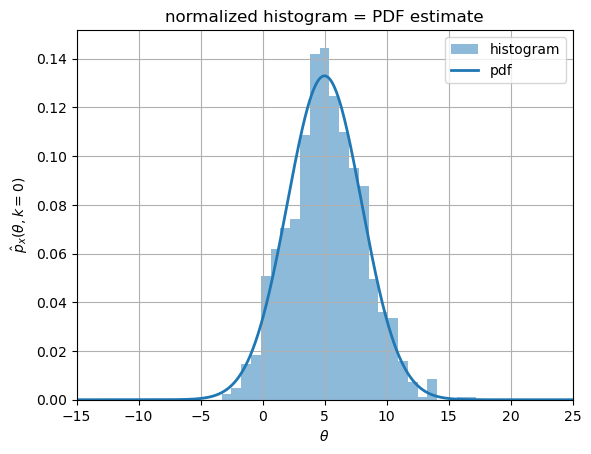

In [4]:
# set seed for reproducible results
seed = 1234
stats.norm.random_state = Generator(PCG64(seed))

# create random process based on normal distribution
Ns = 2**10  # number of sample functions for e.g. time instance k=0
loc, scale = 5, 3  # mu, sigma

theta = np.arange(-15, 25, 0.01)  # amplitudes for plotting PDF
# random process object with normal PDF
rv = stats.norm(loc=loc, scale=scale)
# get random data from sample functions
x = stats.norm.rvs(loc=loc, scale=scale, size=Ns)

# plot
fig, ax = plt.subplots(1, 1)
hist_estimate = ax.hist(x, bins='auto', density=True, histtype='bar',
                        color='C0', alpha=0.5, label='histogram')
ax.plot(theta, rv.pdf(theta), 'C0-', lw=2, label='pdf')
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\hat{p}_x(\theta,k=0)$')
ax.set_title('normalized histogram = PDF estimate')
ax.set_xlim(-15, 25)
ax.legend()
ax.grid(True)

# get histogram data from ax.hist()
edges = hist_estimate[1]
freq = hist_estimate[0]

# simple ensemble averages by numeric integration
# over histogram data as a simple estimate of the pdf
theta_num = edges[:-1]
dtheta = np.diff(edges)
mu = np.sum(theta_num * freq * dtheta)  # mu estimate
qm = np.sum(theta_num**2 * freq * dtheta)  # quadratic mean estimate
sig2 = np.sum((theta_num-mu)**2 * freq * dtheta)  # sigma^2 estimate
print('ideal   ensemble average: mu = %5.2f, mu^2 = %5.2f, sigma^2 = %5.2f, mu^2 + sigma^2 = %5.2f' %
      (loc, loc**2, scale**2, loc**2+scale**2))
print('numeric ensemble average: mu = %5.2f, mu^2 = %5.2f, sigma^2 = %5.2f, mu^2 + sigma^2 = %5.2f' %
      (mu, mu**2, sig2, qm))
print('ideal sigma = %5.2f, numeric sigma = %5.2f' % (scale, np.sqrt(sig2)))

# We should think about:

# play around with Ns: what happens if you increase / decrease Ns in terms of
# the histogram plot and the estimated first-order ensemble averages

# play around with loc==mean, scale==sigma: how is the histogram and pdf
# changed, what tells us the standard deviation in terms of the area under the
# pdf

# ax.hist(x,...) is a handy tool for plotting and getting histogram data
# we have chosen bins='auto', density=True. Calculating these data is not
# trivial, at least if the histogram should represent the data in pdf-like
# form as here. So we should make sure that we are aware of the concepts for
# so called kernel density estimation
# Nice programming task would be manual histogram calc and plot for
# bins=100 and density=False, i.e. a classical manual histogram

# Example: Histogram of Gaussian Noise, Cosine and Rectangular Signal

Here we use the numpy histogram with fixed number of bins and really the histogram mode rather than the density mode.

We here do not strictly deal with random sample functions (for the cosine and rect), but with amplitude values over time. We do this for practical purpose however, since it is nice to get an idea what a histogram looks like for known signals.

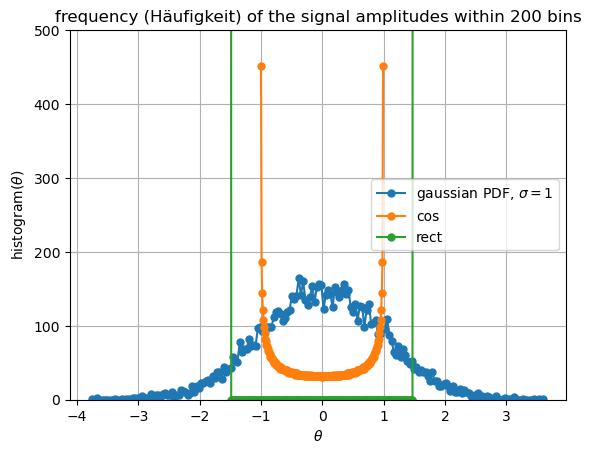

In [5]:
bins = 200

Ns = 10000  # number of sample function
Nt = 1  # number of time steps per sample function

# normal pdf
x = np.random.normal(loc=0, scale=1, size=[Ns, 1])
pdf, edges = np.histogram(x[:, 0], bins=bins, density=False)
plt.plot(edges[:-1], pdf, 'o-', ms=5, label=r'gaussian PDF, $\sigma=1$')

# cosine signal with peak amplitude 1
x = np.cos(1 * 2*np.pi/Ns*np.arange(0, Ns))
pdf, edges = np.histogram(x, bins=bins, density=False)
plt.plot(edges[:-1], pdf, 'o-', ms=5, label='cos')

# rect signal with amplitude 1.5
x = np.cos(1 * 2*np.pi/Ns*np.arange(0, Ns))
x[x >= 0] = +1.5
x[x < 0] = -1.5
pdf, edges = np.histogram(x, bins=bins, density=False)
plt.plot(edges[:-1], pdf, 'o-', ms=5, label='rect')

plt.ylim(0, 500)
plt.xlabel(r'$\theta$')
plt.ylabel(r'histogram($\theta$)')
plt.title('frequency (Häufigkeit) of the signal amplitudes within 200 bins')
plt.legend()
plt.grid(True)

# We should think about:

# what happens if we apply a DC component to the cos and rect signal,
# e.g. x += 1

# we should able to predict the green histogram values exactly, how should
# plt.ylim(0, ???) altered to plot the histogram for the rect more nicely

#  Example: Higher-Order Ensemble Averages

In [6]:
# create two random processes based on normal distribution
Ns = 2**10  # number of sample functions at certain time instant k
Nt = 1  # number of time steps per sample function
np.random.seed(1)

# 1st process:
locx, scalex = 1, 3
x = np.random.normal(loc=locx, scale=scalex, size=[Ns, Nt])

# 2nd process:
locy, scaley = 2, 4
y = np.random.normal(loc=locy, scale=scaley, size=[Ns, Nt])

# check the case y = x, then: crosspower->auto power, covariance -> variance, correlation coefficient rho=1

In [7]:
crosspower = np.mean(x * y)
covariance = np.mean((x-np.mean(x)) * (y-np.mean(y)))
rho = np.mean((x-np.mean(x))/np.std(x) * (y-np.mean(y))/np.std(y))
print('crosspower = %4.3f, covariance = %4.3f,  correlation coefficient rho = %4.3f' %
      (crosspower, covariance, rho))

crosspower = 2.048, covariance = -0.256,  correlation coefficient rho = -0.021


# Ensemble Average vs. Temporal Average

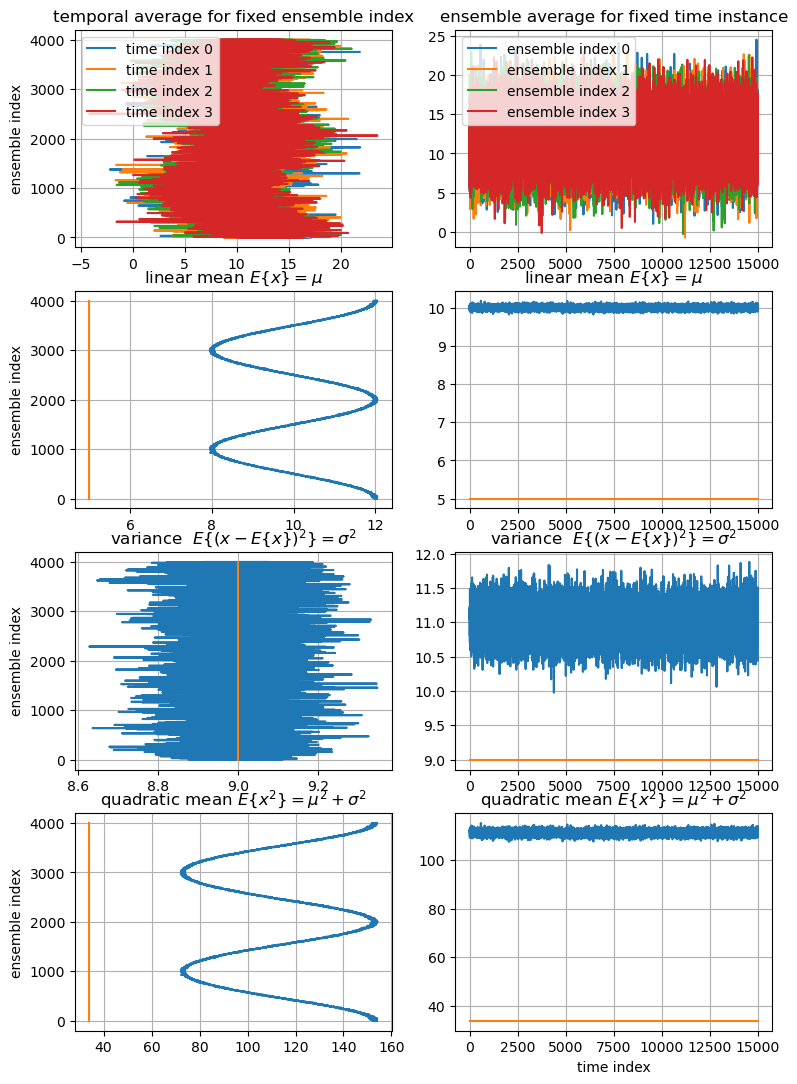

In [8]:
# create random process based on normal distribution
Ns = 4000  # number of samples to set up an ensemble
Nt = 15000  # number of time steps to set up 'ensemble over time'-characteristics
np.random.seed(1)

s = np.arange(Ns)  # ensemble index (s to indicate sample function)
t = np.arange(Nt)  # time index

loc, scale = 5, 3  # mu, sigma
x = np.random.normal(loc=loc, scale=scale, size=[Ns, Nt])

# we check the three cases:
# 1. simulate an ergodic process, i.e. ensemble average == temporal average
case_str = 'x'
# 2./3. very simple simulation of non-stationary process by changing the mean
case_str = 'cos_s'  # add cosine over ensemble equally for all time instances
# case_str = 'cos_t'  # add cosine over time equally for all ensembles

# the plots nicely show the concept of
# temporal average (left column) vs. ensemble average (right column)
# we make sure to understand it with the
# cos-like patterns either over samples or over time instances

if case_str == 'x':  # use x directly == ergodic process
    tmp = 1  # dummy variable since nothing to do here
elif case_str == 'cos_s':  # add cosine over ensemble equally for all time instances
    tmp = 2*np.cos(2 * 2*np.pi/Ns * np.arange(0, Ns)) + 5
    x = x + np.transpose(np.tile(tmp, (Nt, 1)))
elif case_str == 'cos_t':  # add cosine over time equally for all ensembles
    tmp = 2*np.cos(2 * 2*np.pi/Nt * np.arange(0, Nt)) + 5
    x = x + np.tile(tmp, (Ns, 1))

fig, axs = plt.subplots(4, 2, figsize=(9, 13))
# plot signals
for i in range(4):
    axs[0, 0].plot(x[:, i], s, label='time index '+str(i))
    axs[0, 1].plot(t, x[i, :], label='ensemble index '+str(i))
# plot means
axs[1, 0].plot(np.mean(x, axis=1), s)
axs[1, 1].plot(t, np.mean(x, axis=0))
axs[1, 0].plot([loc, loc], [0, Ns])
axs[1, 1].plot([0, Nt], [loc, loc])
# plot variance
axs[2, 0].plot(np.var(x, axis=1), s)
axs[2, 1].plot(t, np.var(x, axis=0))
axs[2, 0].plot([scale**2, scale**2], [0, Ns])
axs[2, 1].plot([0, Nt], [scale**2, scale**2])
# plot quadratic mean
axs[3, 0].plot(np.mean(x**2, axis=1), s)
axs[3, 1].plot(t, np.mean(x**2, axis=0))
axs[3, 0].plot([loc**2+scale**2, loc**2+scale**2], [0, Ns])
axs[3, 1].plot([0, Nt], [loc**2+scale**2, loc**2+scale**2])
# labeling
axs[3, 1].set_xlabel('time index')
for i in range(4):
    #axs[i,1].set_xlabel('time index')
    axs[i, 0].set_ylabel('ensemble index')
    for j in range(2):
        axs[i, j].grid(True)
axs[0, 0].set_title(r'temporal average for fixed ensemble index')
axs[0, 1].set_title(r'ensemble average for fixed time instance')
for i in range(2):
    axs[0, i].legend(loc='upper left')
    axs[1, i].set_title(r'linear mean $E\{x\} = \mu$')
    axs[2, i].set_title(r'variance  $E\{(x -E\{x\} )^2\} = \sigma^2$')
    axs[3, i].set_title(r'quadratic mean $E\{x^2\} = \mu^2+\sigma^2$')

# Higher-Order Temporal Averages

In [9]:
# create two random processes based on normal distribution
Ns = 1  # number of sample functions at certain time instant k
Nt = 2**7  # number of time steps per sample function
np.random.seed(1)

# 1st process:
locx, scalex = 1, 3
x = np.random.normal(loc=locx, scale=scalex, size=[Ns, Nt])

# 2nd process:
locy, scaley = 2, 4
y = np.random.normal(loc=locy, scale=scaley, size=[Ns, Nt])

## Auto Correlation Function (ACF)

/var/folders/v3/d1rkkg8x113cdy05ym6vxy300000gn/T/ipykernel_30680/1393578891.py:4: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(kappa, ccf, basefmt='C0:', use_line_collection=True)
/var/folders/v3/d1rkkg8x113cdy05ym6vxy300000gn/T/ipykernel_30680/1393578891.py:10: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(kappa, ccf, basefmt='C0:', use_line_collection=True)


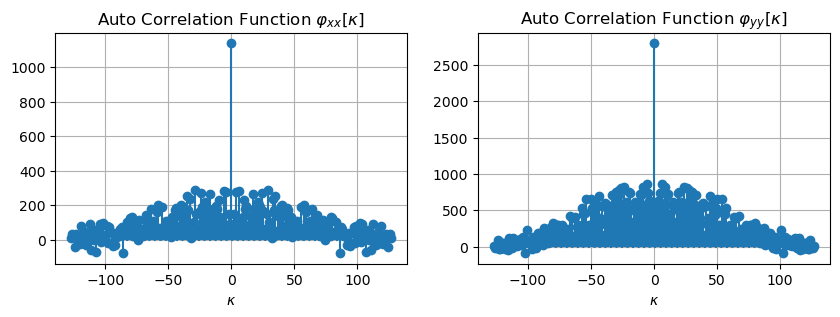

In [10]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
kappa, ccf = my_xcorr(x[0, :], x[0, :])
plt.stem(kappa, ccf, basefmt='C0:', use_line_collection=True)
plt.xlabel(r'$\kappa$')
plt.title(r'Auto Correlation Function $\varphi_{xx}[\kappa]$')
plt.grid(True)
plt.subplot(1, 2, 2)
kappa, ccf = my_xcorr(y[0, :], y[0, :])
plt.stem(kappa, ccf, basefmt='C0:', use_line_collection=True)
plt.xlabel(r'$\kappa$')
plt.title(r'Auto Correlation Function $\varphi_{yy}[\kappa]$')
plt.grid(True)

# check the axial symmetry, why is the peak always at kappa=0

## Cross Correlation Function (CCF)

/var/folders/v3/d1rkkg8x113cdy05ym6vxy300000gn/T/ipykernel_30680/1512081277.py:4: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(kappa, ccf, basefmt='C0:', use_line_collection=True)
/var/folders/v3/d1rkkg8x113cdy05ym6vxy300000gn/T/ipykernel_30680/1512081277.py:11: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(kappa, ccf, basefmt='C0:', use_line_collection=True)


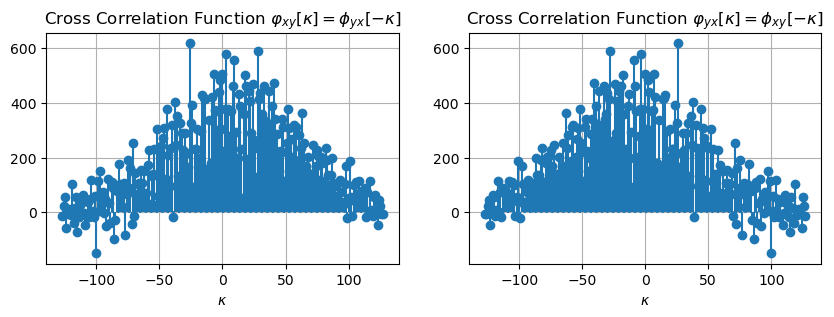

In [11]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
kappa, ccf = my_xcorr(x[0, :], y[0, :])
plt.stem(kappa, ccf, basefmt='C0:', use_line_collection=True)
plt.xlabel(r'$\kappa$')
plt.title(
    r'Cross Correlation Function $\varphi_{xy}[\kappa]=\phi_{yx}[-\kappa]$')
plt.grid(True)
plt.subplot(1, 2, 2)
kappa, ccf = my_xcorr(y[0, :], x[0, :])
plt.stem(kappa, ccf, basefmt='C0:', use_line_collection=True)
plt.xlabel(r'$\kappa$')
plt.title(
    r'Cross Correlation Function $\varphi_{yx}[\kappa]=\phi_{xy}[-\kappa]$')
plt.grid(True)

# check the mirrored versions and how they related wrt kappa, x,y-sequence

##  Auto Covariance Function

typically no symbol in equations and no abbreviation

/var/folders/v3/d1rkkg8x113cdy05ym6vxy300000gn/T/ipykernel_30680/3146482120.py:4: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(kappa, ccf, basefmt='C0:', use_line_collection=True)
/var/folders/v3/d1rkkg8x113cdy05ym6vxy300000gn/T/ipykernel_30680/3146482120.py:10: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(kappa, ccf, basefmt='C0:', use_line_collection=True)


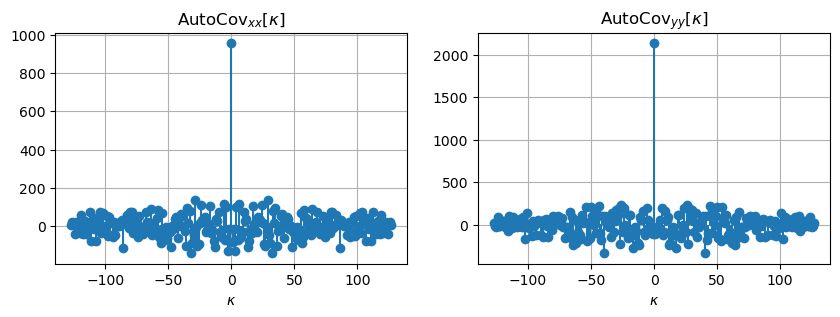

In [12]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
kappa, ccf = my_xcorr(x[0, :]-np.mean(x[0, :]), x[0, :]-np.mean(x[0, :]))
plt.stem(kappa, ccf, basefmt='C0:', use_line_collection=True)
plt.xlabel(r'$\kappa$')
plt.title(r'AutoCov$_{xx}[\kappa]$')
plt.grid(True)
plt.subplot(1, 2, 2)
kappa, ccf = my_xcorr(y[0, :]-np.mean(y[0, :]), y[0, :]-np.mean(y[0, :]))
plt.stem(kappa, ccf, basefmt='C0:', use_line_collection=True)
plt.xlabel(r'$\kappa$')
plt.title(r'AutoCov$_{yy}[\kappa]$')
plt.grid(True)

# check the axial symmetry, why is the peak always at kappa=0

## Cross Covariance Function

typically no symbol in equations and no abbreviation

/var/folders/v3/d1rkkg8x113cdy05ym6vxy300000gn/T/ipykernel_30680/2401022568.py:4: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(kappa, ccf, basefmt='C0:', use_line_collection=True)
/var/folders/v3/d1rkkg8x113cdy05ym6vxy300000gn/T/ipykernel_30680/2401022568.py:10: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(kappa, ccf, basefmt='C0:', use_line_collection=True)


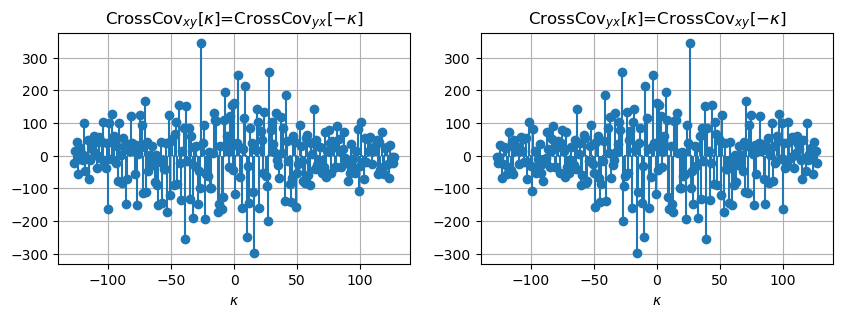

In [13]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
kappa, ccf = my_xcorr(x[0, :]-np.mean(x[0, :]), y[0, :]-np.mean(y[0, :]))
plt.stem(kappa, ccf, basefmt='C0:', use_line_collection=True)
plt.xlabel(r'$\kappa$')
plt.title(r'CrossCov$_{xy}[\kappa]$=CrossCov$_{yx}[-\kappa]$')
plt.grid(True)
plt.subplot(1, 2, 2)
kappa, ccf = my_xcorr(y[0, :]-np.mean(y[0, :]), x[0, :]-np.mean(x[0, :]))
plt.stem(kappa, ccf, basefmt='C0:', use_line_collection=True)
plt.xlabel(r'$\kappa$')
plt.title(r'CrossCov$_{yx}[\kappa]$=CrossCov$_{xy}[-\kappa]$')
plt.grid(True)

# check the mirrored versions and how they related wrt kappa, x,y-sequence

# **Copyright**

The notebooks are provided as [Open Educational Resources](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebooks for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Frank Schultz, Digital Signal Processing - A Tutorial Featuring Computational Examples* with the URL https://github.com/spatialaudio/digital-signal-processing-exercises